##Importing the required libraries and datset

In [1]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sb

num_classes = 10

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
# Convert class vectors to binary class matrices.
from keras import utils as np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

##3 VGG Baseline Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
m1=model.fit(x_train, y_train,batch_size=64,epochs=100,validation_data=(x_test, y_test),shuffle=True)

Epoch 1/100
782/782 [==============================] - 26s 22ms/step - loss: 1.5972 - accuracy: 0.4234 - val_loss: 1.3337 - val_accuracy: 0.5236
Epoch 2/100
782/782 [==============================] - 16s 21ms/step - loss: 1.2529 - accuracy: 0.5560 - val_loss: 1.1934 - val_accuracy: 0.5776
Epoch 3/100
782/782 [==============================] - 16s 21ms/step - loss: 1.0990 - accuracy: 0.6139 - val_loss: 1.0864 - val_accuracy: 0.6119
Epoch 4/100
782/782 [==============================] - 16s 21ms/step - loss: 0.9898 - accuracy: 0.6523 - val_loss: 1.0130 - val_accuracy: 0.6446
Epoch 5/100
782/782 [==============================] - 16s 21ms/step - loss: 0.9047 - accuracy: 0.6855 - val_loss: 1.0457 - val_accuracy: 0.6414
Epoch 6/100
782/782 [==============================] - 16s 21ms/step - loss: 0.8297 - accuracy: 0.7137 - val_loss: 0.9229 - val_accuracy: 0.6795
Epoch 7/100
782/782 [==============================] - 16s 21ms/step - loss: 0.7626 - accuracy: 0.7371 - val_loss: 0.9079 - val_ac

In [ ]:
# evaluate model for %accuracy
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy -> %.3f' % (acc * 100.0),'%')

accuracy -> 71.610 %


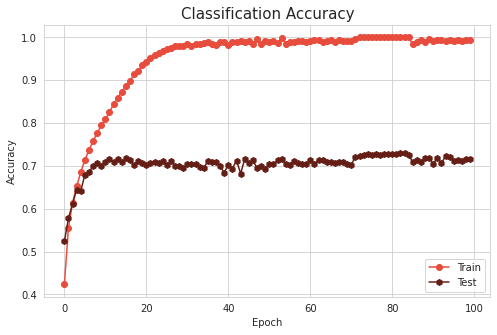

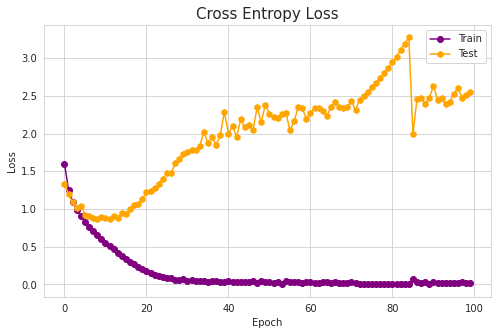

In [ ]:
#Plotting the accuracy curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Classification Accuracy',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# Plotting the loss curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Cross Entropy Loss',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

##Dropout Regularization Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
m2=model.fit(x_train, y_train,batch_size=64,epochs=100,validation_data=(x_test, y_test),shuffle=True)

Epoch 1/100
782/782 [==============================] - 19s 23ms/step - loss: 2.0619 - accuracy: 0.2405 - val_loss: 1.6655 - val_accuracy: 0.4049
Epoch 2/100
782/782 [==============================] - 17s 22ms/step - loss: 1.6176 - accuracy: 0.4085 - val_loss: 1.4242 - val_accuracy: 0.4881
Epoch 3/100
782/782 [==============================] - 17s 21ms/step - loss: 1.4457 - accuracy: 0.4767 - val_loss: 1.3197 - val_accuracy: 0.5240
Epoch 4/100
782/782 [==============================] - 17s 21ms/step - loss: 1.3379 - accuracy: 0.5167 - val_loss: 1.2176 - val_accuracy: 0.5623
Epoch 5/100
782/782 [==============================] - 17s 22ms/step - loss: 1.2593 - accuracy: 0.5454 - val_loss: 1.1659 - val_accuracy: 0.5855
Epoch 6/100
782/782 [==============================] - 17s 21ms/step - loss: 1.1814 - accuracy: 0.5772 - val_loss: 1.0972 - val_accuracy: 0.6046
Epoch 7/100
782/782 [==============================] - 17s 21ms/step - loss: 1.1136 - accuracy: 0.6020 - val_loss: 1.0117 - val_ac

In [ ]:
# evaluate model for %accuracy
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy -> %.3f' % (acc * 100.0),'%')

accuracy -> 81.510 %


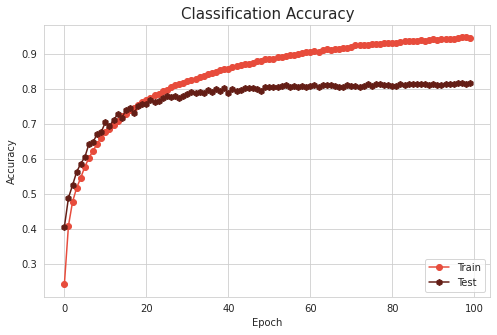

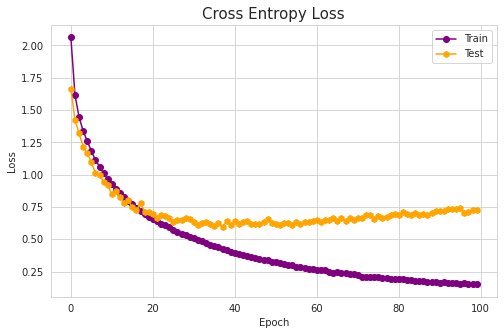

In [ ]:
#Plotting the accuracy curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Classification Accuracy',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# Plotting the loss curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="Purple",marker='o')
plt.plot(m2.history['val_loss'],color='Orange',marker='h')
plt.title('Cross Entropy Loss',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

##Data Augmentation Model

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [5]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [6]:
# create data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)
steps = int(x_train.shape[0] / 64)

In [7]:
m3=model.fit(it_train,steps_per_epoch=steps,epochs=100,validation_data=(x_test, y_test),shuffle=True)

Epoch 1/100
781/781 [==============================] - 56s 55ms/step - loss: 1.6940 - accuracy: 0.3895 - val_loss: 1.3936 - val_accuracy: 0.4968
Epoch 2/100
781/781 [==============================] - 44s 56ms/step - loss: 1.3879 - accuracy: 0.5043 - val_loss: 1.2466 - val_accuracy: 0.5476
Epoch 3/100
781/781 [==============================] - 44s 56ms/step - loss: 1.2437 - accuracy: 0.5578 - val_loss: 1.1704 - val_accuracy: 0.5799
Epoch 4/100
781/781 [==============================] - 44s 56ms/step - loss: 1.1466 - accuracy: 0.5951 - val_loss: 1.0341 - val_accuracy: 0.6376
Epoch 5/100
781/781 [==============================] - 44s 56ms/step - loss: 1.0726 - accuracy: 0.6214 - val_loss: 1.0153 - val_accuracy: 0.6449
Epoch 6/100
781/781 [==============================] - 44s 57ms/step - loss: 1.0122 - accuracy: 0.6469 - val_loss: 1.0171 - val_accuracy: 0.6516
Epoch 7/100
781/781 [==============================] - 44s 56ms/step - loss: 0.9731 - accuracy: 0.6604 - val_loss: 0.9535 - val_ac

In [8]:
# evaluate model for %accuracy
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy -> %.3f' % (acc * 100.0),'%')

accuracy -> 83.630 %


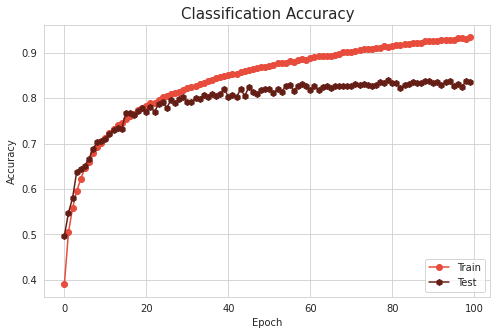

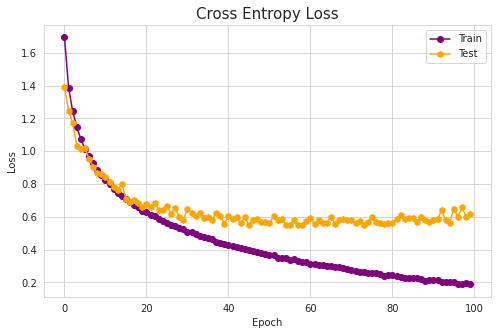

In [9]:
#Plotting the accuracy curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m3.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Classification Accuracy',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# Plotting the loss curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m3.history['loss'],color="Purple",marker='o')
plt.plot(m3.history['val_loss'],color='Orange',marker='h')
plt.title('Cross Entropy Loss',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

##Dropout & Data Augmentation Model

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
# create data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)
steps = int(x_train.shape[0] / 64) 

In [13]:
m4=model.fit(it_train, steps_per_epoch=steps,epochs=100,validation_data=(x_test, y_test),shuffle=True)

Epoch 1/100
781/781 [==============================] - 45s 57ms/step - loss: 1.9244 - accuracy: 0.2842 - val_loss: 1.5765 - val_accuracy: 0.4338
Epoch 2/100
781/781 [==============================] - 44s 57ms/step - loss: 1.5945 - accuracy: 0.4142 - val_loss: 1.3769 - val_accuracy: 0.5040
Epoch 3/100
781/781 [==============================] - 45s 57ms/step - loss: 1.4696 - accuracy: 0.4641 - val_loss: 1.3906 - val_accuracy: 0.4972
Epoch 4/100
781/781 [==============================] - 45s 57ms/step - loss: 1.3784 - accuracy: 0.5016 - val_loss: 1.3041 - val_accuracy: 0.5300
Epoch 5/100
781/781 [==============================] - 44s 57ms/step - loss: 1.3060 - accuracy: 0.5326 - val_loss: 1.2348 - val_accuracy: 0.5604
Epoch 6/100
781/781 [==============================] - 44s 57ms/step - loss: 1.2407 - accuracy: 0.5557 - val_loss: 1.1408 - val_accuracy: 0.5962
Epoch 7/100
781/781 [==============================] - 44s 57ms/step - loss: 1.1881 - accuracy: 0.5752 - val_loss: 1.0822 - val_ac

In [14]:
# evaluate model for %accuracy
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy -> %.3f' % (acc * 100.0),'%')

accuracy -> 84.710 %


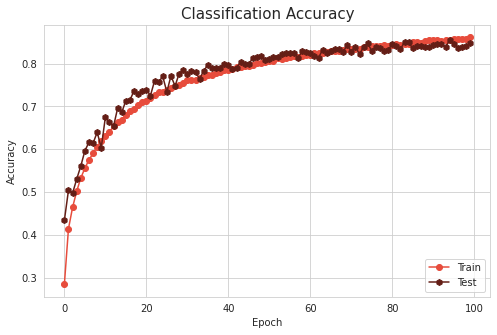

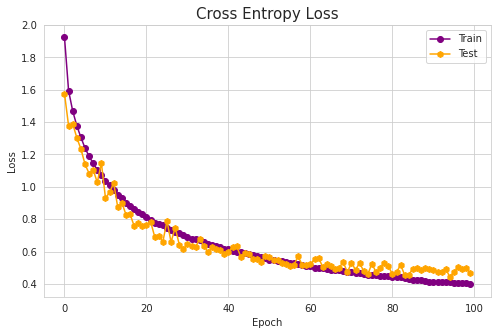

In [15]:
#Plotting the accuracy curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m4.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m4.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Classification Accuracy',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# Plotting the loss curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m4.history['loss'],color="Purple",marker='o')
plt.plot(m4.history['val_loss'],color='Orange',marker='h')
plt.title('Cross Entropy Loss',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

##Final Model using Dropout, Data Augmentation & Batch Normalization

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [17]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [18]:
# create data augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)
steps = int(x_train.shape[0] / 64)

In [19]:
m5=model.fit(it_train, steps_per_epoch=steps,epochs=100,validation_data=(x_test, y_test),shuffle=True)

Epoch 1/100
781/781 [==============================] - 50s 62ms/step - loss: 2.5763 - accuracy: 0.2417 - val_loss: 1.6541 - val_accuracy: 0.4129
Epoch 2/100
781/781 [==============================] - 48s 61ms/step - loss: 1.9982 - accuracy: 0.3379 - val_loss: 1.4667 - val_accuracy: 0.4761
Epoch 3/100
781/781 [==============================] - 47s 60ms/step - loss: 1.7756 - accuracy: 0.3861 - val_loss: 1.4232 - val_accuracy: 0.4873
Epoch 4/100
781/781 [==============================] - 47s 61ms/step - loss: 1.6347 - accuracy: 0.4256 - val_loss: 1.4475 - val_accuracy: 0.4837
Epoch 5/100
781/781 [==============================] - 48s 61ms/step - loss: 1.5133 - accuracy: 0.4624 - val_loss: 1.3968 - val_accuracy: 0.5076
Epoch 6/100
781/781 [==============================] - 47s 61ms/step - loss: 1.4241 - accuracy: 0.4937 - val_loss: 1.3882 - val_accuracy: 0.5226
Epoch 7/100
781/781 [==============================] - 47s 61ms/step - loss: 1.3421 - accuracy: 0.5211 - val_loss: 1.2879 - val_ac

In [20]:
# evaluate model for %accuracy
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('accuracy -> %.3f' % (acc * 100.0),'%')

accuracy -> 86.160 %


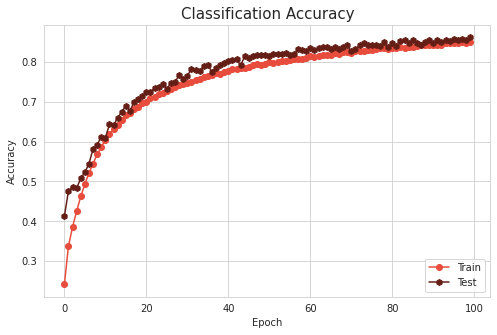

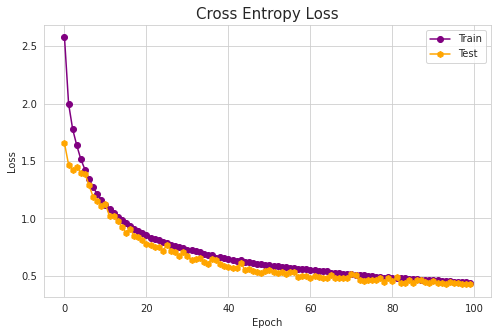

In [21]:
#Plotting the accuracy curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m5.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m5.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Classification Accuracy',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
# Plotting the loss curve
plt.figure(figsize=(8,5))
sb.set_style("whitegrid")
plt.plot(m5.history['loss'],color="Purple",marker='o')
plt.plot(m5.history['val_loss'],color='Orange',marker='h')
plt.title('Cross Entropy Loss',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()